<a href="https://colab.research.google.com/github/glee1228/dsc2019/blob/master/dsc2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Competition 2019 
#### coding by glee1228@naver.com


### Colab 연동하기

In [1]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



### 시각화 라이브러리 import

In [2]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [8]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


### 한글폰트 설정하기

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


In [10]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 47
nanum_font number: 31


In [11]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.7
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 12.0


In [12]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 우선 fm._rebuild() 를 해주면 이제 준비가 완료되었다.
fm._rebuild()

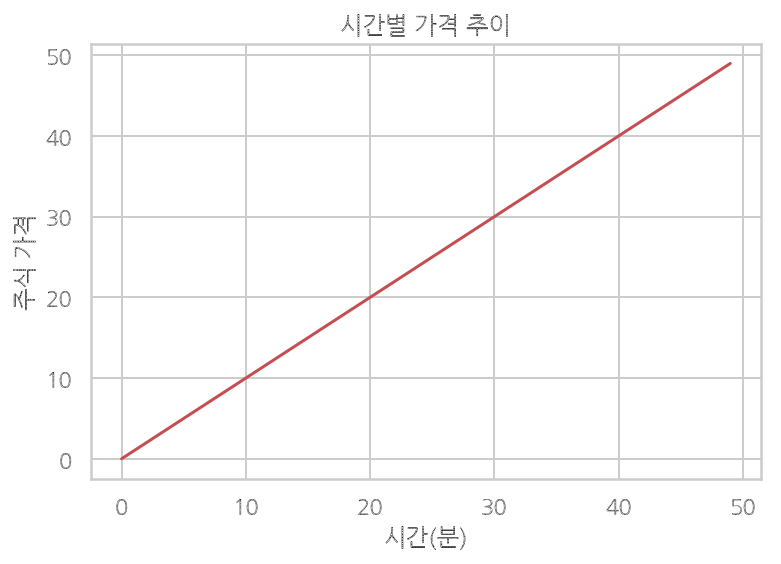

In [14]:
# 그려보자
plt.plot(range(50), range(50), 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 데이터 확인하기

In [15]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv
st_data_goldForeign.tsv    st_data_koreaIndex.tsv


### 학습데이터 로딩

In [16]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv

# 학습데이터 로딩
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')

goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 우선 금(Gold) 과 유가(Oil) , 원자재(Goods) 데이터의 통계량과 분포형태 및 대칭정도를  확인해보자! 

st_data_goldForeign.tsv

st_data_oilForeign.tsv

st_data_goodsForeign.tsv


In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('Datetime으로 type이 이미 변환되었습니다.')
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])


def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

def getItemCodes(df):
  return df['itemcode'].unique()

def getItemNames(df):
  return df['itemname'].unique()

def getCodeNames(df):
  codes = getItemCodes(df)
  names = getItemNames(df)
  return zip(codes,names)

def getGraph(df,colName):
  dummy=setDateIndex(df)
  code = getItemCodes(dummy)
  name = getItemNames(dummy)
  print('{}({})'.format(name[0],code[0]))
  end_date = dummy.index[-1] + datetime.timedelta(days=10)
  plt.plot(dummy.index,dummy[colName],label=name)
  plt.text(end_date, dummy[colName][-1], str(name[0]), weight = 'bold', fontsize=12)
  plt.xlabel(dummy.index.name)
  plt.ylabel(colName)
    

### 모든 데이터들 dictionary로 묶자

In [0]:
# Date (Int) -> Date(DateTime)
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


allDataDict={'goldKorea':goldKorea,'goldForeign':goldForeign,'oilKorea':oilKorea,'oilForeign':oilForeign,'exchange':exchange,'goodsForeign':goodsForeign,'foreignCharge':foreignCharge,'itemChargeFull':itemChargeFull,'koreaIndex':koreaIndex}


### 금의 item종류

In [19]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


### 원유의 item종류

In [20]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


### 원자재의 item종류

In [21]:
print(goodsForeign['itemcode'].unique())
print(goodsForeign['itemname'].unique())

['LME@AAY' 'CBT$BO' 'CBT$C' 'LME@CDY' 'NYM@HO' 'LME@NDY' 'NYM@NG'
 'LME@PDY' 'CBT$RR' 'CBT$S' 'NYB@SB' 'LME@SDY' 'CBT$SM' 'CBT$W' 'LME@ZDY']
['알루미늄합금' '대두유' '옥수수' '구리' '난방유' '니켈' '천연가스' '납' '쌀' '대두' '설탕' '주석' '대두박'
 '소맥' '아연']


In [0]:
gGoldForeign=goldForeign.groupby(goldForeign['itemcode'])
gOilForeign=oilForeign.groupby(oilForeign['itemcode'])
gGoodsForeign = goodsForeign.groupby(goodsForeign['itemcode'])

In [23]:
print(goldForeign.info())
print(goldKorea.info())
print(type(gGoldForeign))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null 

## 데이터 시각화 
해외 유가, 금, 원자재 그래프 시각화하기!


브렌트유(IPE@EB)
WTI(서부텍사스유) (NYM@CL)
두바이유(NYM@DC)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


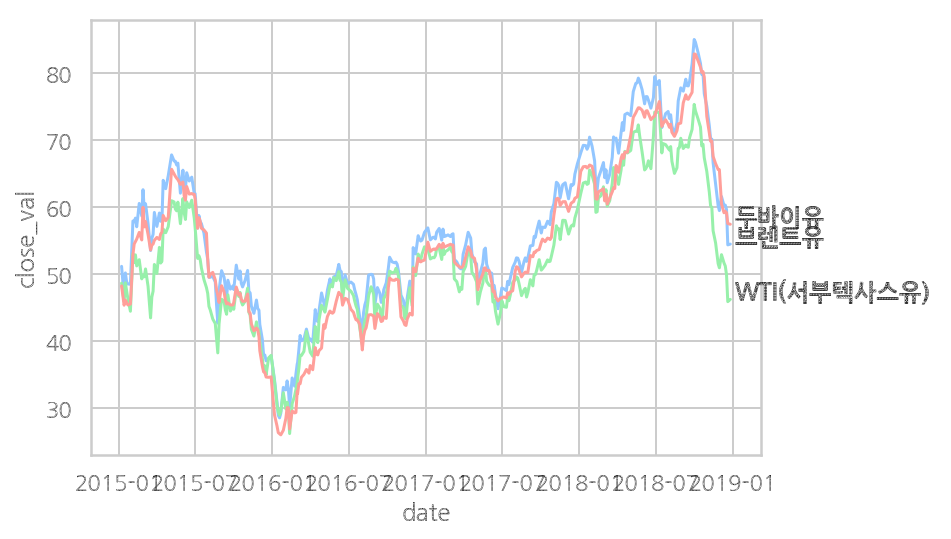

국제 금(COM@GC)
은(COM@SI)
팔라듐(NYM@PA)
백금(NYM@PL)


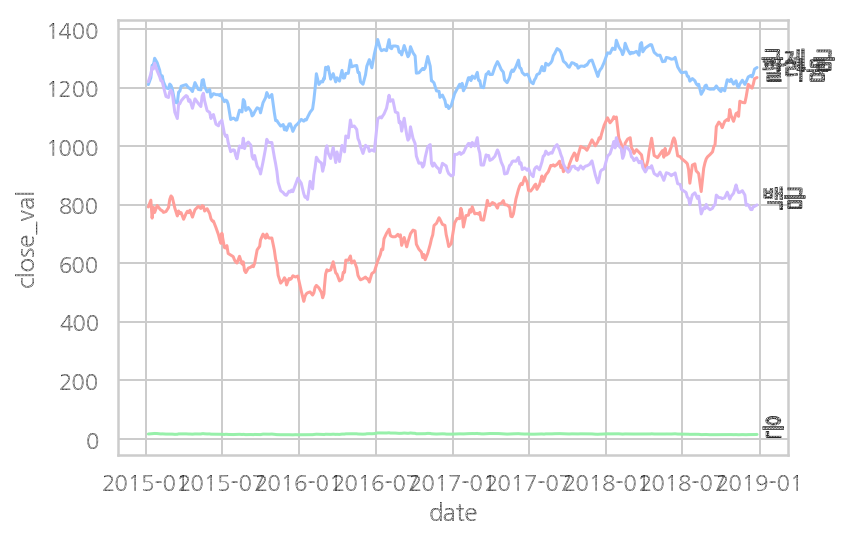

대두유(CBT$BO)
옥수수(CBT$C)
쌀(CBT$RR)
대두(CBT$S)
대두박(CBT$SM)
소맥(CBT$W)
알루미늄합금(LME@AAY)
구리(LME@CDY)
니켈(LME@NDY)
납(LME@PDY)
주석(LME@SDY)
아연(LME@ZDY)
설탕(NYB@SB)
난방유(NYM@HO)
천연가스(NYM@NG)


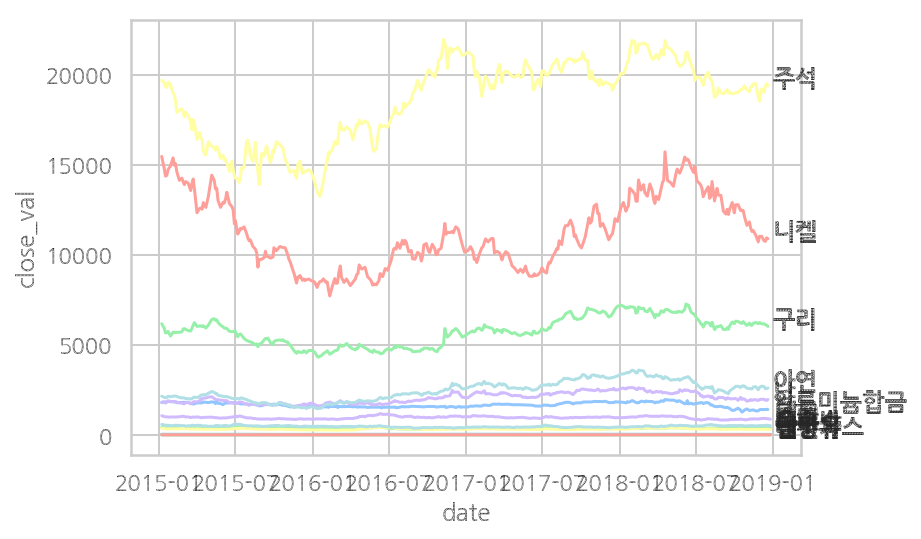

In [24]:
# 종가를 시계열로 시각화
for id, group in gOilForeign:
  getGraph(group,'close_val')
plt.show()


for id, group in gGoldForeign:
  getGraph(group,'close_val')
plt.show()

for id, group in gGoodsForeign:
  getGraph(group,'close_val')
plt.show()


그래프 시각화를 보면, 팔라듐의 그래프 형태가 금 종류 중 가장 특이한 형태를 보이고 있는데, 어떤 이슈가 있을까?

## 국내 상장 주식 데이터 시각화

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


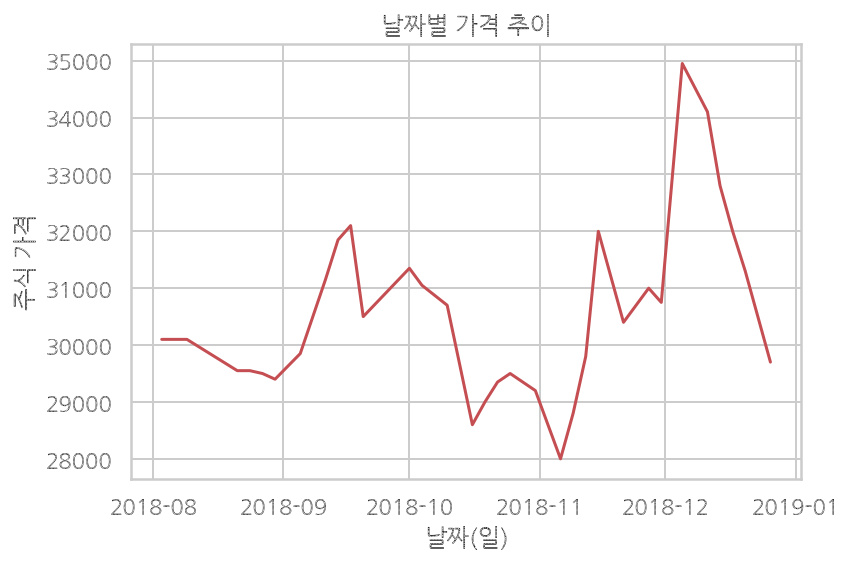

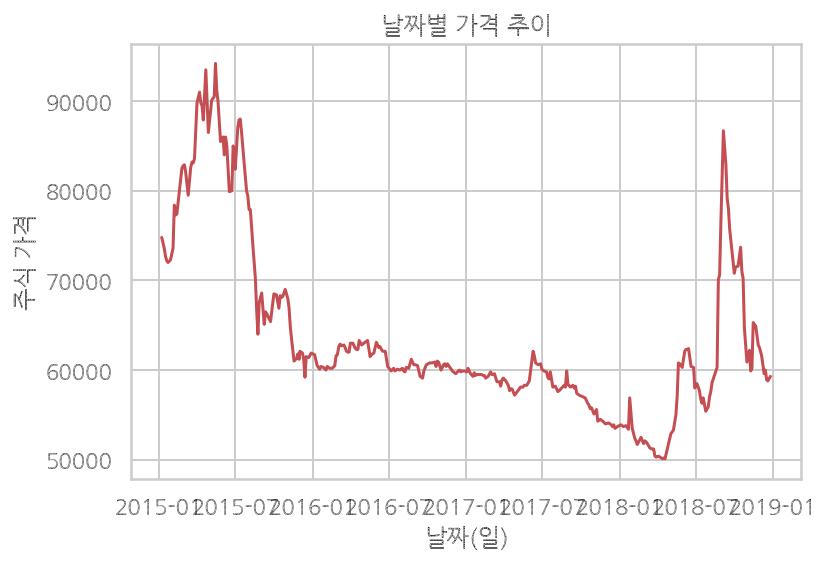

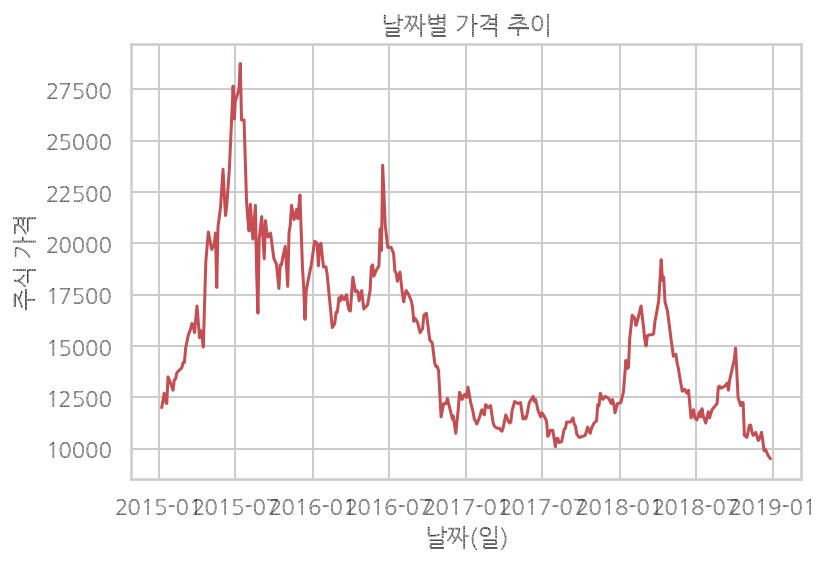

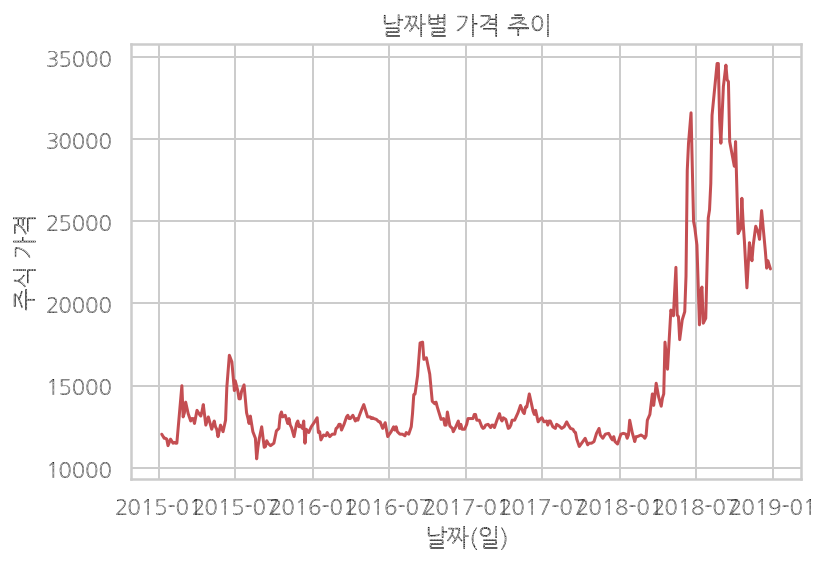

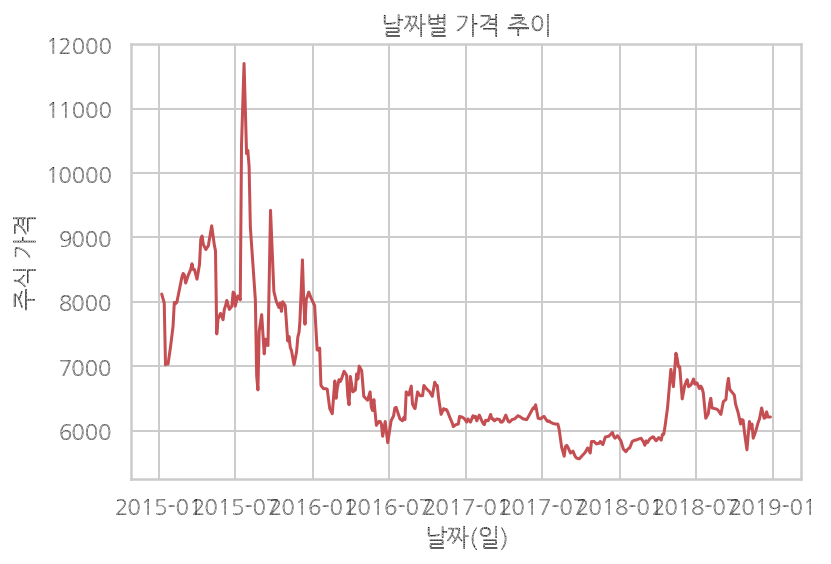

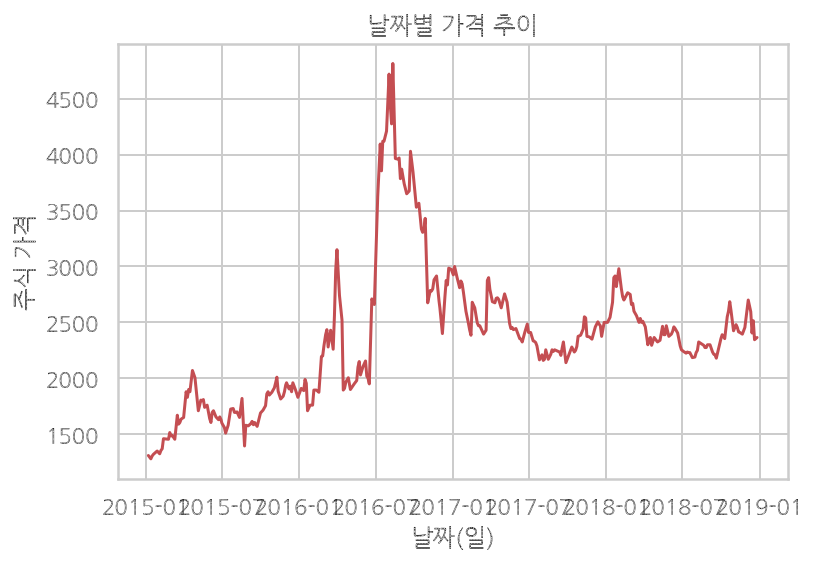

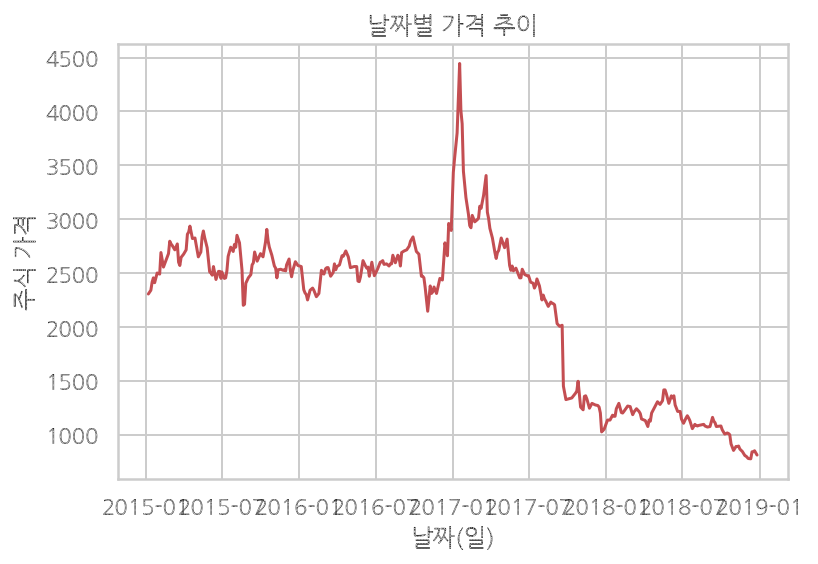

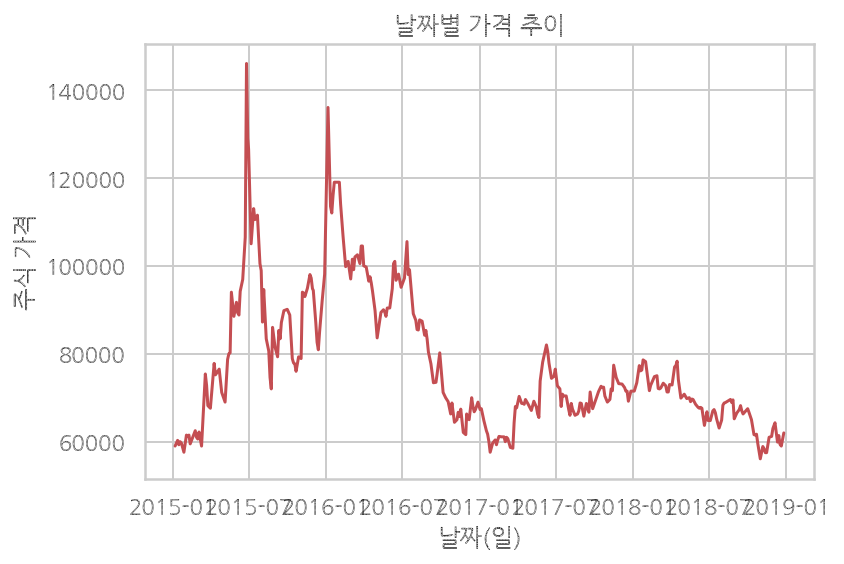

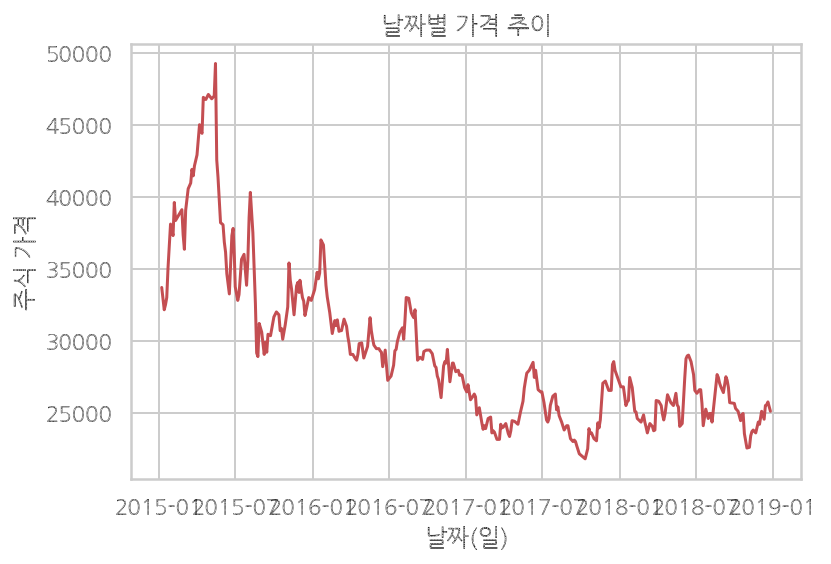

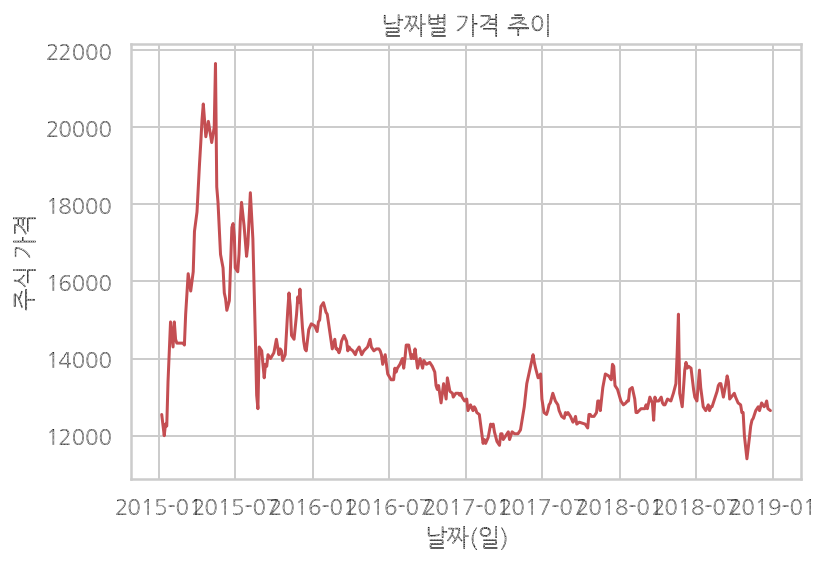

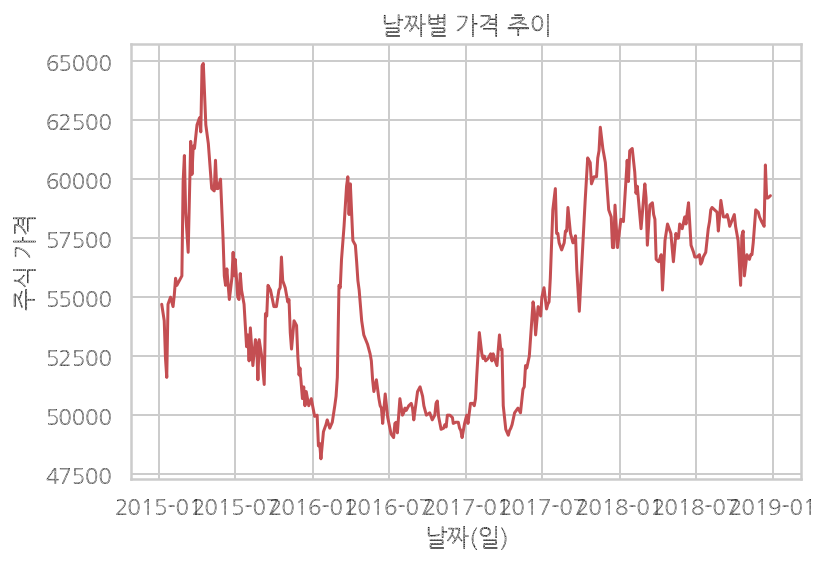

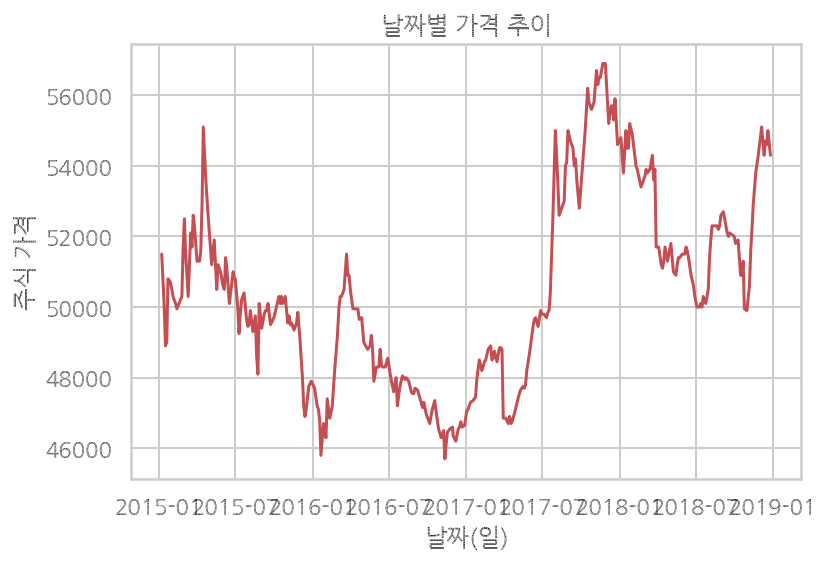

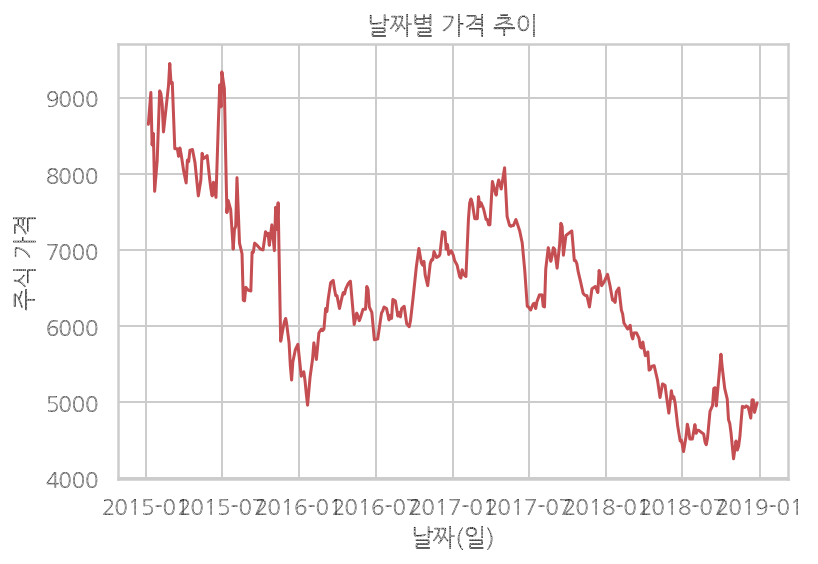

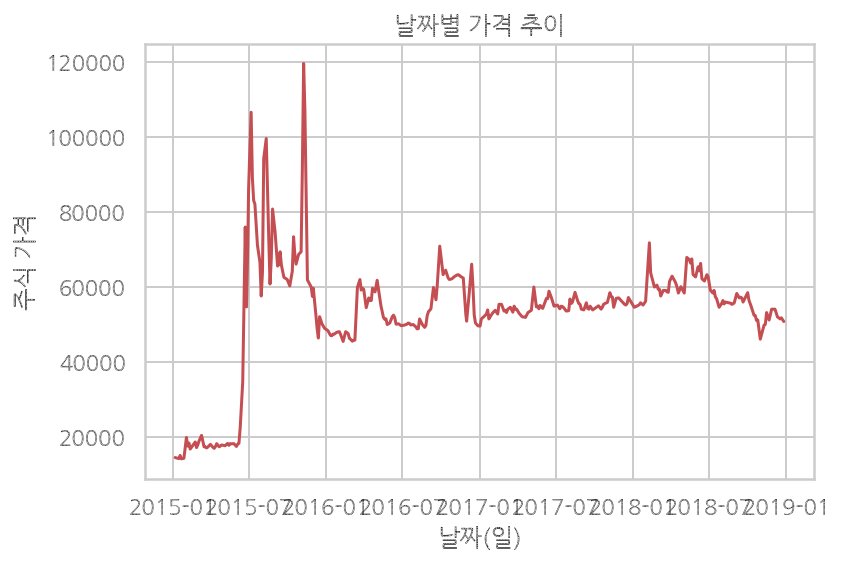

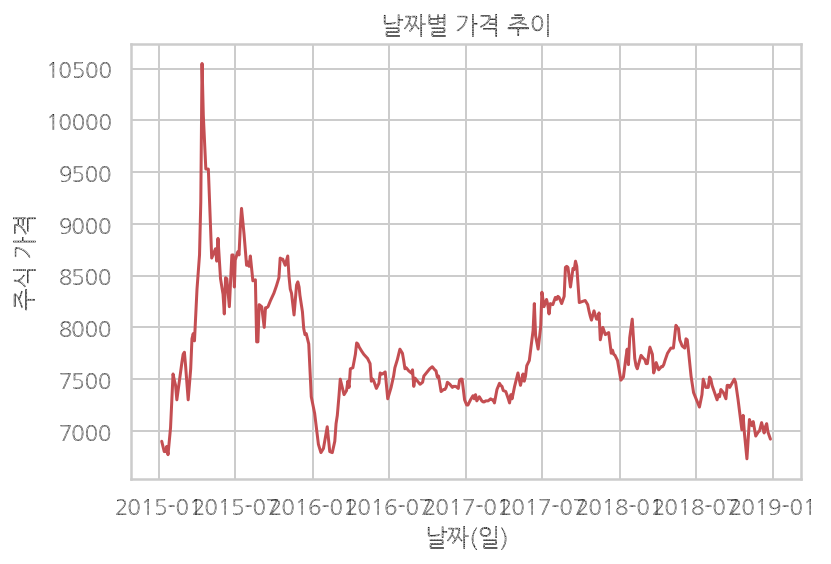

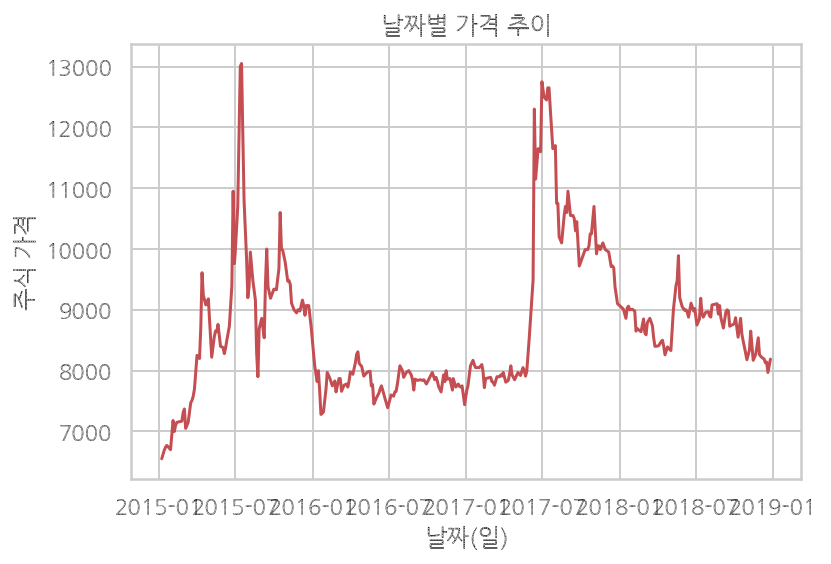

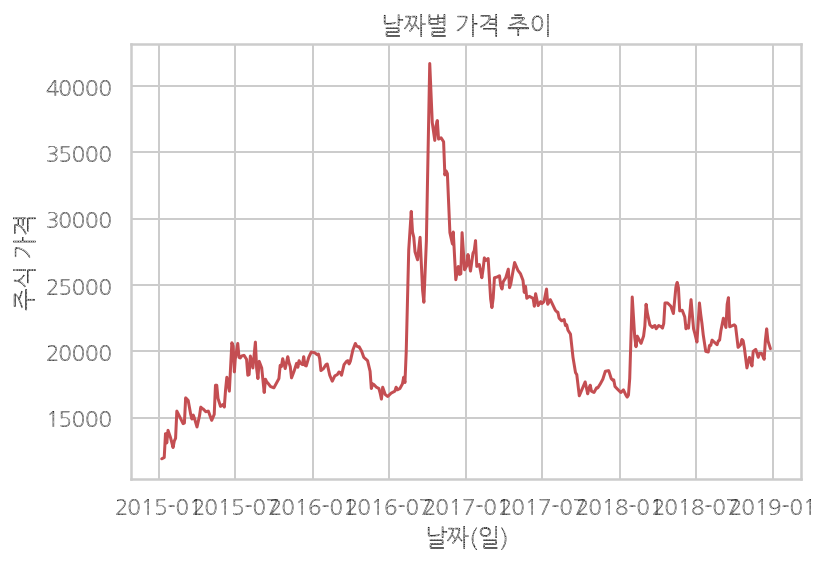

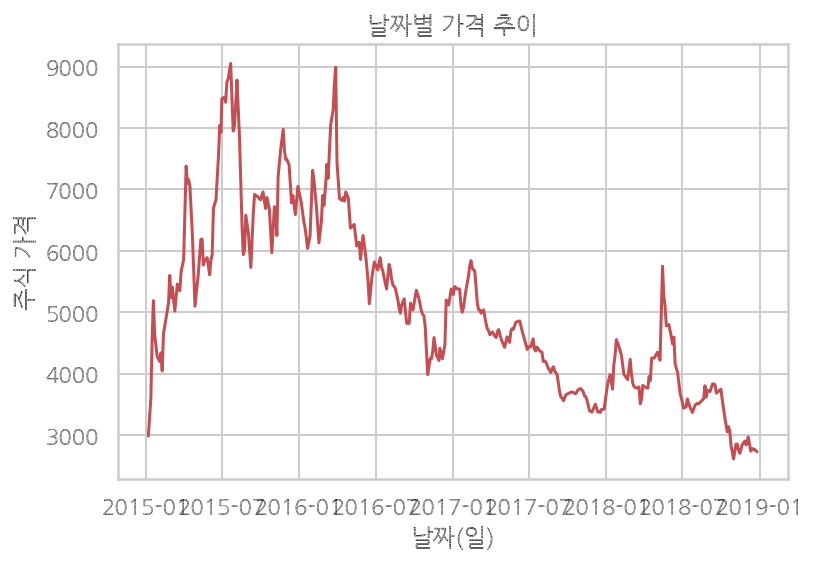

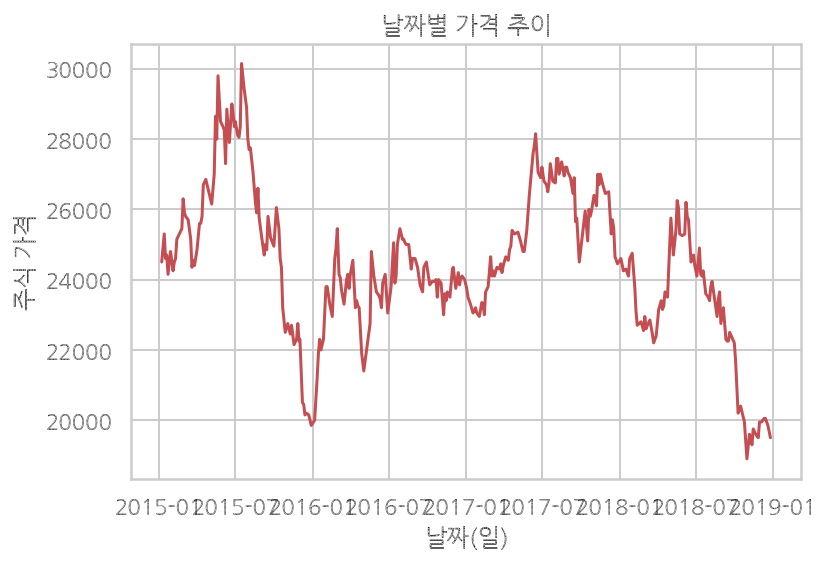

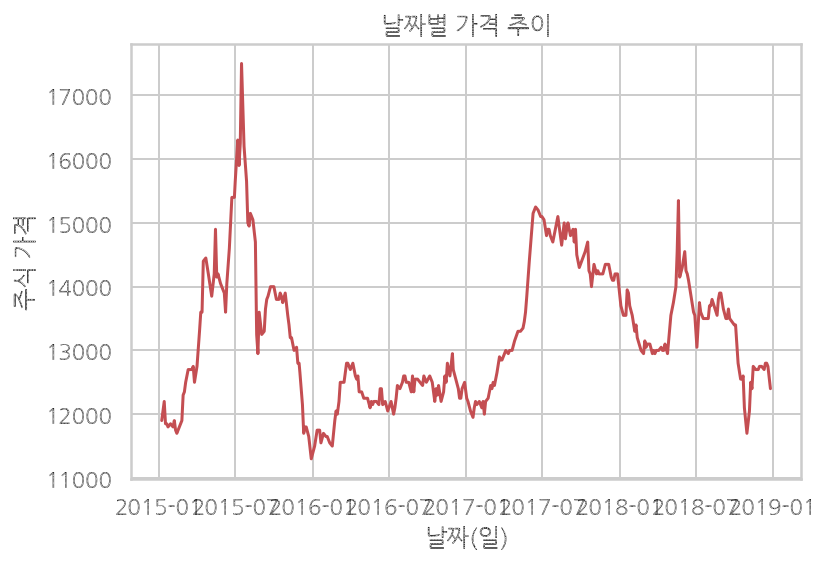

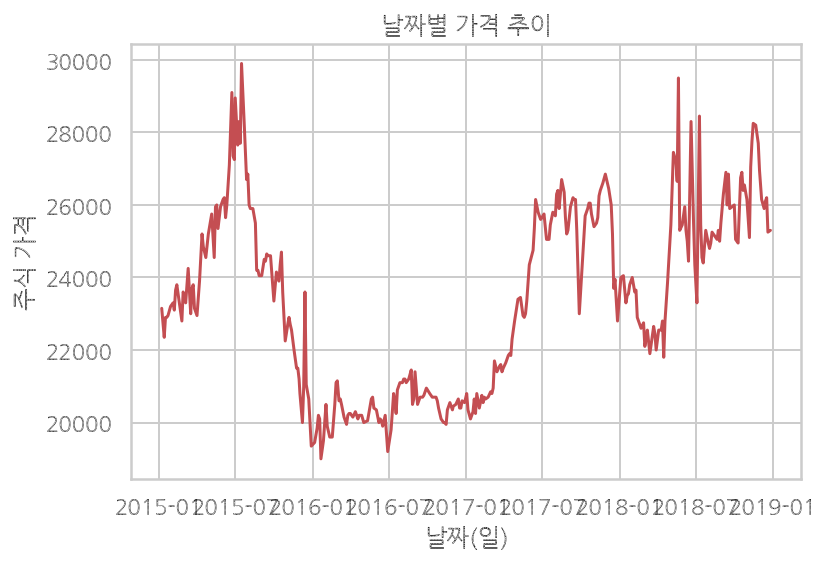

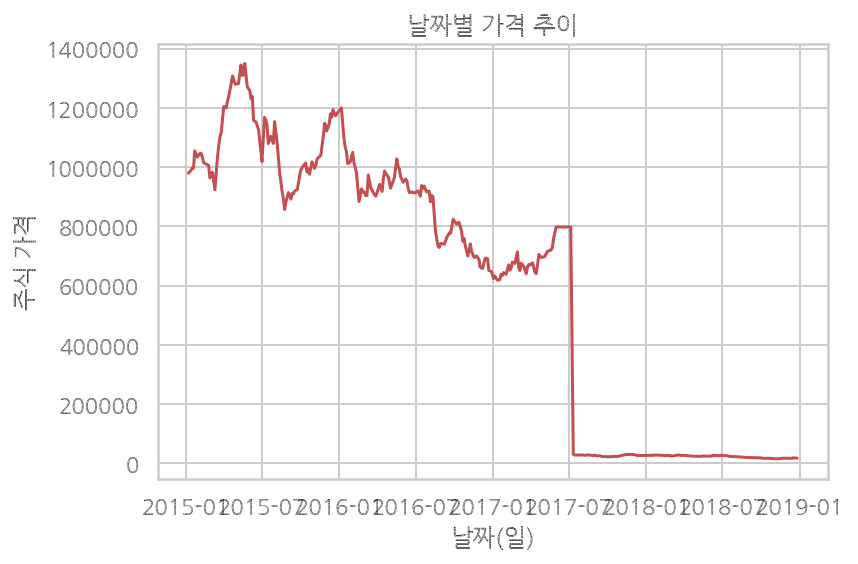

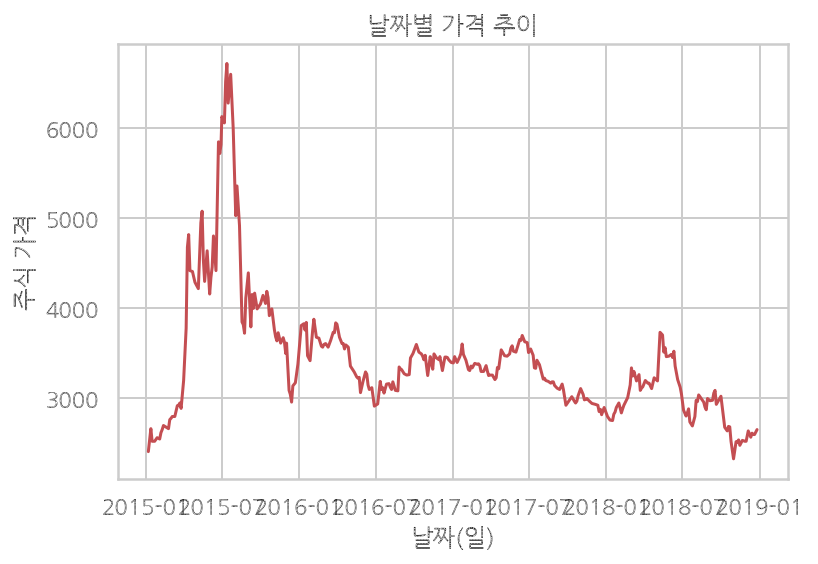

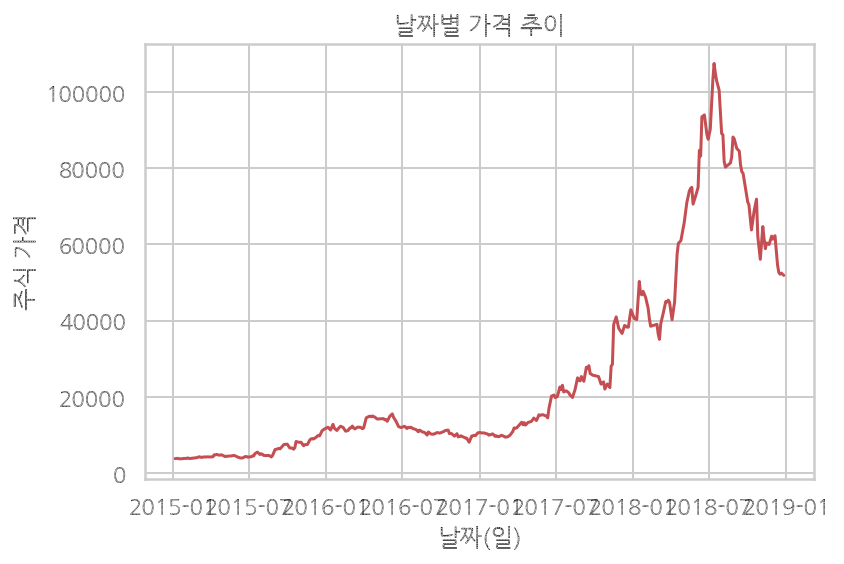

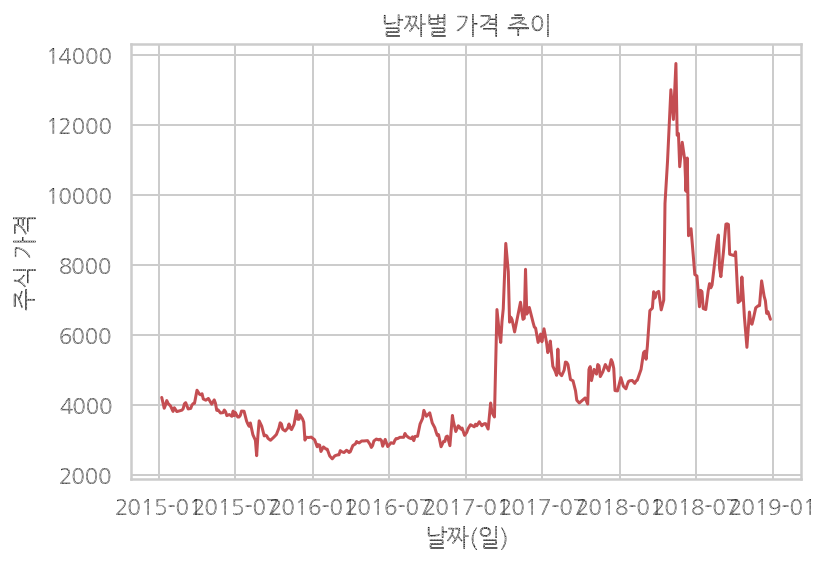

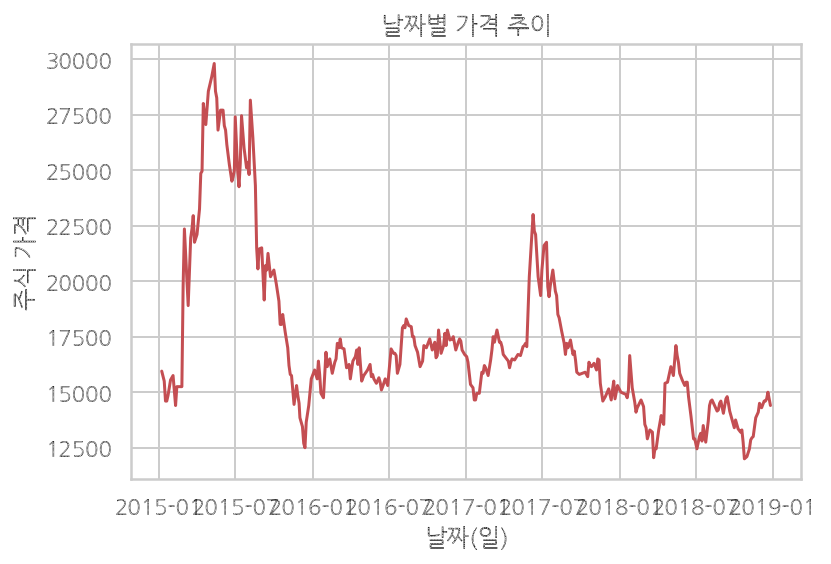

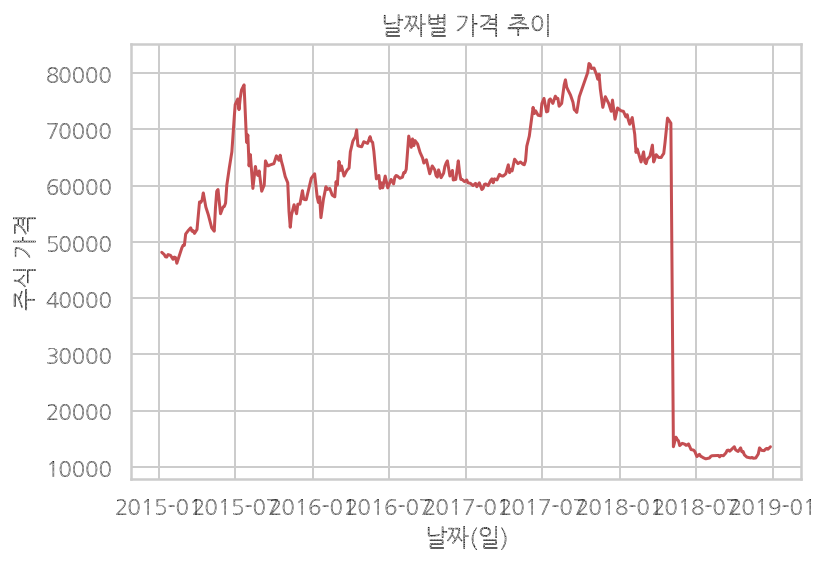

KeyboardInterrupt: ignored

In [125]:
## 국내 상장 주식 데이터 시각화
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
gItemChargeFull = groupByItem(itemChargeFull)
cnt=0
for id,group in gItemChargeFull:
  if cnt==0 or cnt==1:
    closeValDf = group.loc[:, ['date','close_val']]
    closeValDf=convertToDatetime(closeValDf)
    plt.plot(closeValDf['date'],closeValDf['close_val'], 'r')
    plt.title('날짜별 가격 추이')
    plt.ylabel('주식 가격')
    plt.xlabel('날짜(일)')
    plt.style.use('seaborn-pastel')
    plt.show()

## 데이터 중심화 경향을 보자

In [184]:
getItemNames(gOilForeign)

itemcode
IPE@EB            [브렌트유]
NYM@CL    [WTI(서부텍사스유) ]
NYM@DC            [두바이유]
Name: itemname, dtype: object

In [183]:
gOilForeign.describe()

close_val                                                             \
             count       mean        std    min     25%    50%     75%    max   
itemcode                                                                        
IPE@EB       333.0  56.134294  11.858035  28.55  48.290  54.47  63.690  84.98   
NYM@CL       333.0  51.848378  10.090894  26.21  45.830  50.18  59.130  75.30   
NYM@DC       331.0  53.774314  12.177522  26.02  45.615  52.76  61.775  82.82   

         change_val            ... high_val        low_val             \
              count      mean  ...      75%    max   count       mean   
itemcode                       ...                                      
IPE@EB        332.0  0.041054  ...   64.670  86.43   333.0  55.273754   
NYM@CL        332.0  0.043554  ...   59.270  76.47   333.0  50.999309   
NYM@DC        324.0  0.000173  ...   61.775  82.82   331.0  53.774133   

                                                          
                std    min     25%    50%     75%    max  
itemcode                                                  
IPE@EB    11.854866  27.29  47.460  53.70  63.100  84.14  
NYM@CL    10.096796  26.05  44.770  49.22  58.040  73.88  
NYM@DC    12.177421  26.02  45.615  52.76  61.775  82.82  

[3 rows x 40 columns]

In [185]:
getItemNames(gGoldForeign)

itemcode
COM@GC    [국제 금]
COM@SI       [은]
NYM@PA     [팔라듐]
NYM@PL      [백금]
Name: itemname, dtype: object

In [182]:
gGoldForeign.describe()

close_val                                                         \
             count         mean         std       min       25%       50%   
itemcode                                                                    
COM@GC       333.0  1232.231231   71.461738  1050.800  1194.100  1235.000   
COM@SI       333.0    16.350574    1.434780    13.666    15.345    16.436   
NYM@PA       333.0   797.227778  182.616772   469.800   648.000   778.700   
NYM@PL       334.0   968.938623  105.842454   768.700   907.775   957.700   

                             change_val            ...  high_val           \
               75%       max      count      mean  ...       75%      max   
itemcode                                           ...                      
COM@GC    1283.400  1364.900      332.0 -0.188855  ...  1286.000  1374.90   
COM@SI      17.143    20.666      331.0 -0.001088  ...    17.215    20.75   
NYM@PA     956.900  1234.900      333.0  0.375225  ...   958.300  1245.00   
NYM@PL    1012.875  1284.000      331.0 -0.243202  ...  1015.525  1288.90   

         low_val                                                         \
           count         mean         std       min       25%       50%   
itemcode                                                                  
COM@GC     333.0  1227.475676   71.487641  1049.600  1189.700  1231.400   
COM@SI     333.0    16.283718    1.425516    13.666    15.244    16.375   
NYM@PA     333.0   795.083033  184.142059   451.500   647.900   778.700   
NYM@PL     334.0   965.937126  104.458555   768.700   906.650   951.700   

                              
               75%       max  
itemcode                      
COM@GC    1277.800  1359.000  
COM@SI      17.101    20.405  
NYM@PA     951.050  1234.900  
NYM@PL    1006.325  1283.800  

[4 rows x 40 columns]

## 분포형태와 대칭정도를 분석해보자!
왜도(skewness) : 자료의 대칭성을 알아 볼 수 있다. 꼬리가 오른쪽으로 길면 양수의 왜도, 꼬리가 왼쪽으로 길면 음수의 왜도이다.

첨도(kurtosis) :정규 분포 대비, 데이터 분포의 뾰족한 정도를 확인할 수 있다.

In [0]:
from scipy.stats import skew
from scipy.stats import kurtosis


def getSkewKurtosis(df,colName):
  dummy=df[colName]
  return skew(dummy),kurtosis(dummy)

#groupby된 dataframe에서 가장 크고 작은 Skewness,Kurtosis의 이름을 출력하고 반환한다.
#시간대별로 1개월,3개월,6개월,1년단위로 잘라서 넣어봐도 괜찮을 것 같다.

#return dict(key:name, value:[skewness,kurtosis]) type
def getDictSkewKurtosis(groupdf,colName):
  skDict = {}  
  for id, group in groupdf:
    skewVal=0
    kurtosisVal = 0
    skewVal,kurtosisVal = getSkewKurtosis(group,colName)
    itemname = getItemNames(group)[0]
    skDict[itemname]=[skewVal,kurtosisVal]
  
  return skDict


def getMaxMinVal(dic,index):
  valueList=[]
  
  for key,value in dic.items():
#     if index==0:
#       print('{}의 왜도(skewness)는 {}'.format(key,value[index]))
#     elif index==1:
#       print('{}의 첨도(kurtosis)는 {}'.format(key,value[index]))
    
    valueList.append(value[index])
  maxVal=max(valueList)
  minVal=min(valueList)
  return maxVal,minVal
  

def analysisDict(dic):
  skewHigh,skewLow = getMaxMinVal(dic,0)
  kurtosisHigh, kurtosisLow = getMaxMinVal(dic,1)
  
  print('{} 중에서 평가합니다. '.format(list(dic.keys())))
  print('')
  if skewHigh>0 and skewLow>0:
    print('해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.')
  elif skewHigh<0 and skewLow<0:
    print('해당 데이터들은 모두 우측으로 데이터 분포가 치우쳐져 있습니다.')
  else :
    print('해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.')
    
  if kurtosisHigh<3 and kurtosisLow<3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.')
  elif kurtosisHigh>3 and kurtosisLow>3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 중앙에 집중 되어 있습니다.')
  else :
    print('해당 데이터들은 첨도(kurtosis)의 특징이 모두 같지는 않습니다')
  
  
  print('max Skewness value은 {} 이고, min Skewness value은 {} 입니다'.format(skewHigh,skewLow))
  print('max kurtosis value은 {} 이고, min kurtosis value은 {} 입니다'.format(kurtosisHigh,kurtosisLow))
  print()

In [28]:
dic1 = getDictSkewKurtosis(gOilForeign,'close_val')
dic2 = getDictSkewKurtosis(gGoldForeign,'close_val')
dic3 = getDictSkewKurtosis(gGoodsForeign,'close_val')

analysisDict(dic1)
analysisDict(dic2)
analysisDict(dic3)

['브렌트유', 'WTI(서부텍사스유) ', '두바이유'] 중에서 평가합니다. 

해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.2810707721027385 이고, min Skewness value은 0.16060428525459722 입니다
max kurtosis value은 -0.28367436245456146 이고, min kurtosis value은 -0.3744093901243071 입니다

['국제 금', '은', '팔라듐', '백금'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.6172025603090334 이고, min Skewness value은 -0.47091208479140567 입니다
max kurtosis value은 0.18396461964090616 이고, min kurtosis value은 -0.8742654389263262 입니다

['대두유', '옥수수', '쌀', '대두', '대두박', '소맥', '알루미늄합금', '구리', '니켈', '납', '주석', '아연', '설탕', '난방유', '천연가스'] 중에서 평가합니다. 

해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 0.8943255723361463 이고, min Skewness value은 -0.5357072765403734 입니다
max kurtosis value은 2.1269535540811804 이고, min kurtosis value은 -1.22723197777784 입니다



### 데이터를 회귀분석에 맞게 정제해볼까?

In [29]:
for key in allDataDict.keys():
  print(key)

goldKorea
goldForeign
oilKorea
oilForeign
exchange
goodsForeign
foreignCharge
itemChargeFull
koreaIndex


In [30]:
gKoreaIndex=groupByItem(koreaIndex)
getItemCodes(gKoreaIndex)

itemcode
KOSDAQ    [KOSDAQ]
KOSPI      [KOSPI]
KPI200    [KPI200]
Name: itemcode, dtype: object

In [193]:
oilNames=getItemNames(gOilForeign)
print(oilNames)

goldNames=getItemNames(gGoldForeign)
print(goldNames)

itemcode
IPE@EB            [브렌트유]
NYM@CL    [WTI(서부텍사스유) ]
NYM@DC            [두바이유]
Name: itemname, dtype: object
itemcode
COM@GC    [국제 금]
COM@SI       [은]
NYM@PA     [팔라듐]
NYM@PL      [백금]
Name: itemname, dtype: object


In [192]:
closeValDf = pd.DataFrame()
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
gItemChargeFull = groupByItem(itemChargeFull)
cnt=0
for id,group in gItemChargeFull:
  itemcode = getItemCodes(group)[0]
  if cnt==0 or cnt==1:
    closeValDf = pd.DataFrame()
    closeValDf = group.loc[:, ['date','close_val']]
    closeValDf.rename(columns={'close_val':itemcode}, inplace=True)
    
  dummyCloseVal = group.loc[:, ['date','close_val']]
  dummyCloseVal.rename(columns={'close_val':itemcode}, inplace=True)
  
  closeValDf=pd.merge(closeValDf, dummyCloseVal, on='date',how='left')
  cnt+=1
  
  if cnt%500==0:
    print(cnt)
    
print(len(closeValDf))


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


500
1000
1500
2000
323


In [235]:
closeValDf.head()

,date,1530_x,1530_y,1540,1550,1560,1570,1620,1630,1680,...,307750,307870,308700,309930,310200,310840,310870,311270,311840,314130
0,20150107,74800.0,74800.0,12000.0,12050.0,8120.0,1310.0,2305.0,59000.0,33700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20150113,73600.0,73600.0,12700.0,11800.0,7980.0,1280.0,2340.0,60300.0,32150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20150116,72700.0,72700.0,12300.0,11800.0,7020.0,1305.0,2415.0,59300.0,32500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20150119,72200.0,72200.0,12200.0,11750.0,7050.0,1320.0,2455.0,60000.0,33000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20150122,72000.0,72000.0,13500.0,11350.0,7030.0,1330.0,2410.0,59700.0,35050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
closeValDfs=closeValDf.dropna(axis=1)

In [0]:
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
gGoldForeign=groupByItem(goldForeign)
gold = pd.DataFrame()
resultDf=closeValDfs.copy(deep=False) #결측치 열 제거한 Dataframe
goldCodes=getItemCodes(gGoldForeign)
for id, group in gGoldForeign:
  gold = group.copy(deep=False)
  foreignGold = gold.loc[:, ['date','close_val']]
  foreignGold.rename(columns={'close_val':id}, inplace=True)
  resultDf=pd.merge(resultDf, foreignGold, on='date',how='left')

In [238]:
resultDf.head()

,date,1530_x,1530_y,1540,1550,1560,1570,1620,1630,1680,...,208370,208640,208710,208890,210120,210610,COM@GC,COM@SI,NYM@PA,NYM@PL
0,20150107,74800.0,74800.0,12000.0,12050.0,8120.0,1310.0,2305.0,59000.0,33700.0,...,2015.0,2685.0,2040.0,2835.0,18100.0,7500.0,1210.6,16.510,792.4,1220.7
1,20150113,73600.0,73600.0,12700.0,11800.0,7980.0,1280.0,2340.0,60300.0,32150.0,...,2030.0,2830.0,2075.0,2690.0,18100.0,7500.0,1234.3,17.125,815.7,1247.4
2,20150116,72700.0,72700.0,12300.0,11800.0,7020.0,1305.0,2415.0,59300.0,32500.0,...,2080.0,2820.0,2140.0,2400.0,18100.0,7500.0,1276.9,17.739,754.3,1269.8
3,20150119,72200.0,72200.0,12200.0,11750.0,7050.0,1320.0,2455.0,60000.0,33000.0,...,2100.0,2830.0,2150.0,2040.0,18100.0,7500.0,1276.6,17.770,791.5,1264.0
4,20150122,72000.0,72000.0,13500.0,11350.0,7030.0,1330.0,2410.0,59700.0,35050.0,...,2070.0,2810.0,2125.0,2650.0,18100.0,7500.0,1300.7,18.346,773.6,1284.0


In [0]:
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
gOilForeign=groupByItem(oilForeign)
oil = pd.DataFrame()
resultDf2=resultDf.copy(deep=False)
oilCodes=getItemCodes(gOilForeign)
for id, group in gOilForeign:
  oil = group.copy(deep=False)
  foreignOil = oil.loc[:, ['date','close_val']]
  foreignOil.rename(columns={'close_val':id}, inplace=True)
  resultDf2=pd.merge(resultDf2, foreignOil, on='date',how='left')

In [240]:
resultDf2.head()

,date,1530_x,1530_y,1540,1550,1560,1570,1620,1630,1680,...,208890,210120,210610,COM@GC,COM@SI,NYM@PA,NYM@PL,IPE@EB,NYM@CL,NYM@DC
0,20150107,74800.0,74800.0,12000.0,12050.0,8120.0,1310.0,2305.0,59000.0,33700.0,...,2835.0,18100.0,7500.0,1210.6,16.510,792.4,1220.7,51.15,48.65,48.23
1,20150113,73600.0,73600.0,12700.0,11800.0,7980.0,1280.0,2340.0,60300.0,32150.0,...,2690.0,18100.0,7500.0,1234.3,17.125,815.7,1247.4,46.59,45.89,45.35
2,20150116,72700.0,72700.0,12300.0,11800.0,7020.0,1305.0,2415.0,59300.0,32500.0,...,2400.0,18100.0,7500.0,1276.9,17.739,754.3,1269.8,50.17,48.69,46.11
3,20150119,72200.0,72200.0,12200.0,11750.0,7050.0,1320.0,2455.0,60000.0,33000.0,...,2040.0,18100.0,7500.0,1276.6,17.770,791.5,1264.0,48.84,47.52,NaN
4,20150122,72000.0,72000.0,13500.0,11350.0,7030.0,1330.0,2410.0,59700.0,35050.0,...,2650.0,18100.0,7500.0,1300.7,18.346,773.6,1284.0,48.52,46.31,45.39


In [0]:
resultDfs=convertToDatetime(resultDf2)
resultDfs=setDateIndex(resultDfs)

In [242]:
resultDfs.head()

,1530_x,1530_y,1540,1550,1560,1570,1620,1630,1680,1685,...,208890,210120,210610,COM@GC,COM@SI,NYM@PA,NYM@PL,IPE@EB,NYM@CL,NYM@DC
date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,74800.0,74800.0,12000.0,12050.0,8120.0,1310.0,2305.0,59000.0,33700.0,12550.0,...,2835.0,18100.0,7500.0,1210.6,16.510,792.4,1220.7,51.15,48.65,48.23
2015-01-13,73600.0,73600.0,12700.0,11800.0,7980.0,1280.0,2340.0,60300.0,32150.0,12000.0,...,2690.0,18100.0,7500.0,1234.3,17.125,815.7,1247.4,46.59,45.89,45.35
2015-01-16,72700.0,72700.0,12300.0,11800.0,7020.0,1305.0,2415.0,59300.0,32500.0,12300.0,...,2400.0,18100.0,7500.0,1276.9,17.739,754.3,1269.8,50.17,48.69,46.11
2015-01-19,72200.0,72200.0,12200.0,11750.0,7050.0,1320.0,2455.0,60000.0,33000.0,12250.0,...,2040.0,18100.0,7500.0,1276.6,17.770,791.5,1264.0,48.84,47.52,NaN
2015-01-22,72000.0,72000.0,13500.0,11350.0,7030.0,1330.0,2410.0,59700.0,35050.0,13400.0,...,2650.0,18100.0,7500.0,1300.7,18.346,773.6,1284.0,48.52,46.31,45.39


In [243]:
resultDfs.shape

(323, 1839)

In [247]:
resultDfs.isnull().sum().sum()

29

In [0]:
finalDf=resultDfs.fillna(method='ffill')

In [267]:
finalDf.shape

(323, 1839)

In [279]:
from sklearn.preprocessing import MinMaxScaler

data = np.array(finalDf)
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
scaler.fit(data)
print(scaler.data_max_)
data = scaler.transform(data) 

[9.420e+04 9.420e+04 2.875e+04 ... 8.498e+01 7.530e+01 8.282e+01]


In [280]:
data[0].shape

(1839,)

In [0]:
dataT = np.transpose(data)

In [0]:
# data split
x_data = dataT[0:-7 , :]
y_data = dataT[-7: , : ]

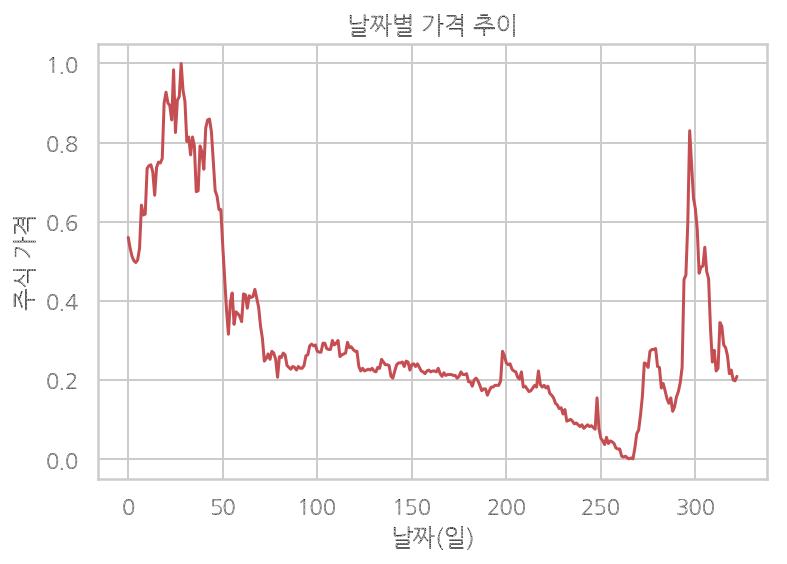

In [291]:
plt.plot(range(len(x_data[0])), x_data[0], 'r')
plt.title('날짜별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('날짜(일)')
plt.style.use('seaborn-pastel')
plt.show()

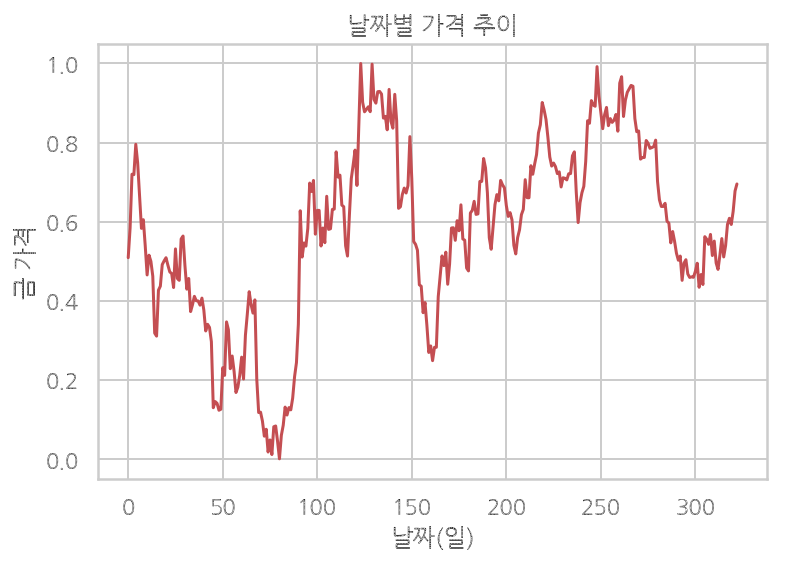

In [292]:
plt.plot(range(len(y_data[0])), y_data[0], 'r')
plt.title('날짜별 가격 추이')
plt.ylabel('금 가격')
plt.xlabel('날짜(일)')
plt.style.use('seaborn-pastel')
plt.show()

In [298]:
print(x_data.shape)
print(y_data[0:1].shape)

(1832, 323)
(1, 323)


### Lasso regression을 활용하여 활용 변수를 찾아보자

In [0]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha=0.3, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [0]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [0]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)